In [9]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt

In [10]:
mass = 1000
vi = 0
dt = 0.1
cd = 0.1

In [11]:
def velocity(throttle, current):
    # print(throttle)
    F = throttle - cd * current ** 2
    a = F/mass
    vf = current + a*dt + np.random.normal(0, 0.1)
    return vf

In [21]:
kp = 100
ki = 1.5
kd = 50

In [22]:
# Variables to store previous values
prev_error = 0
integral = 0

def controller(target_speed, current_speed, dt):
    global prev_error, integral  # Keep values across function calls
    
    # Compute error
    error = target_speed - current_speed
    
    # Proportional term
    p = error
    
    # Integral term (accumulate over time)
    integral += error * dt
    
    # Derivative term (rate of change of error)
    d = (error - prev_error) / dt if dt > 0 else 0 
    
    # Compute PID output
    output = (kp * p) + (ki * integral) + (kd * d)
    
    # Store error for next derivative calculation
    prev_error = error
    
    return output

In [5]:
def controller(target_speed, current_speed):
    p = target_speed - current_speed
    d = p/dt
    i = current_speed * dt
    return kp*p  + ki*i + kd*d

In [23]:
target = 80
current = vi
result = []
for t in np.arange(0, 100, dt):
    throttle = controller(target, current, dt)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

target = 100
for t in np.arange(100, 150, dt):
    throttle = controller(target, current, dt)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

target = 50
for t in np.arange(150, 250, dt):
    throttle = controller(target, current, dt)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

<IPython.core.display.Javascript object>


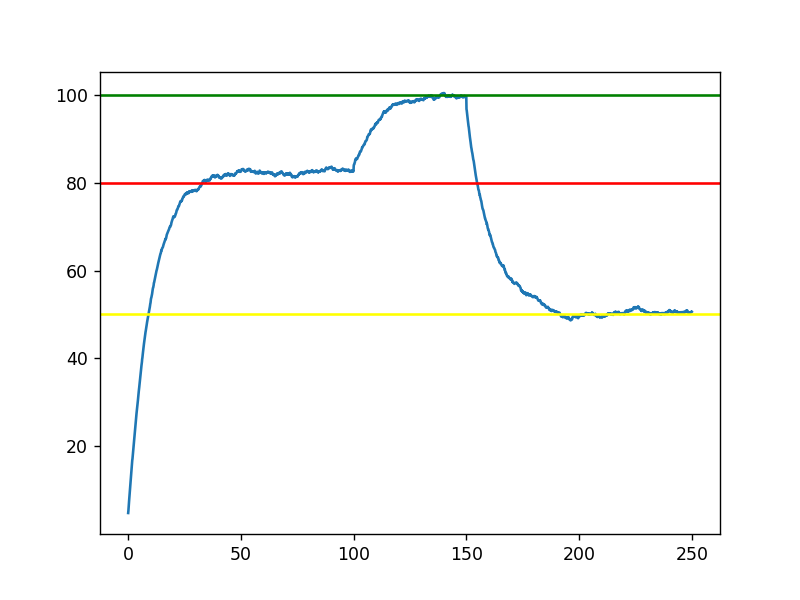

In [25]:
r = np.array(result)
plt.plot(r[:,0], r[:,2])
plt.axhline(80, color="red")
plt.axhline(100, color="green")
plt.axhline(50, color="yellow")

In [8]:
r

array([[0.00000000e+00, 4.80000000e+04, 4.82175169e+00],
       [1.00000000e-01, 4.51071901e+04, 9.37927337e+00],
       [2.00000000e-01, 4.23729049e+04, 1.37222802e+01],
       ...,
       [2.49700000e+02, 2.07471027e+02, 4.95758538e+01],
       [2.49800000e+02, 2.56966487e+02, 4.94007572e+01],
       [2.49900000e+02, 3.62015744e+02, 4.95500237e+01]])